# PHYS 295 Lab 2 Code
I will use this code to get the linear relationship needed and get more questions answered for Lab 2.

## Linear Graph
For the linear graph, there a couple of functions that will be used to analyze the data.
- **load_data(filename)**: This function will be used to extract the data from a csv file that is inputed into the parameter filename. It returns a list with all the pressure data from the 25 saved points in the file.
- **pressure_data()**: This will be the function used to initiate the process of getting all the data needed for the graph. This function returns two list. The first being all the points of data needed for the y-axis of the graph. The second list being the data needed for the error bar.

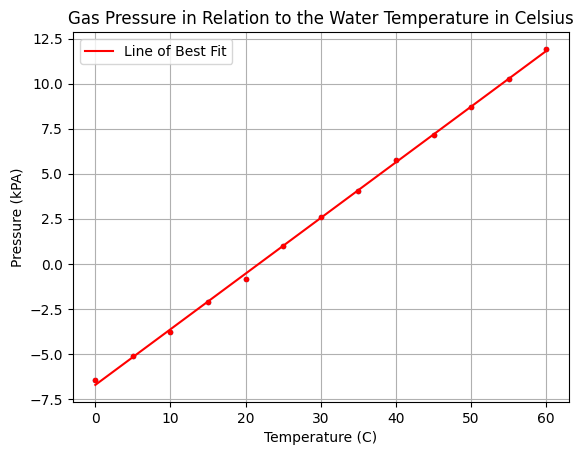

In [40]:
#Lab 2 - Constant Volume Gas Temperature: Linearization
from matplotlib import pyplot as plt 
from scipy import stats
import numpy as np  
import pandas as pd
import csv

def load_data(filename):
    mylist = []
    with open(filename) as numbers:
        numbers_data = csv.reader(numbers, delimiter="\t")
        next(numbers_data) #skip the header
        for row in numbers_data:
            mylist.append(float(row[1]))
        return mylist

def pressure_data():
    point_data = []
    error_data = []
    p_data = [f"pressure_{x:02d}C.csv" for x in range(0, 61, 5)]
    for file in p_data:
        pressure_point = load_data(file)
        mean = round(np.mean(pressure_point), 3)
        error = np.std(pressure_point) / np.sqrt(np.size(pressure_point))
        point_data.append(round(mean, 3))
        error_data.append(round(error, 5))
    return point_data, error_data


data = pressure_data()
x_val1 = np.array([x for x in range(0, 61, 5)])
stat1 = stats.linregress(x_val1, data[0])
x_ax, y_ax = np.polyfit(x_val1, data[0], 1)
plt.figure()
plt.plot(x_val1, x_ax*x_val1+y_ax, color="r") #add line of best fit to plot
plt.legend(['Line of Best Fit'], loc="upper left")
plt.scatter(x_val1, data[0], marker=".") #add points to plot
plt.errorbar(x_val1, data[0], yerr=13*[stat1[4]], fmt=".", color="r")
plt.grid()
plt.title("Gas Pressure in Relation to the Water Temperature in Celsius") 
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (kPA)')
plt.show()

## Slope
With the use of the library scipy, we can find the slope of the graph with the linregress functions in stats.

In [21]:
stat1 = stats.linregress(x_val1, data[0])
print(f"The slope of the graph is equal to {round(stat1[0], 4)}")

The slope of the graph is equal to 0.3089


## Linear Graph (in Kelvin)
Now the linear graph of the same data will be taken in Kelvin so that the linear regressin can be taken from that plot as well

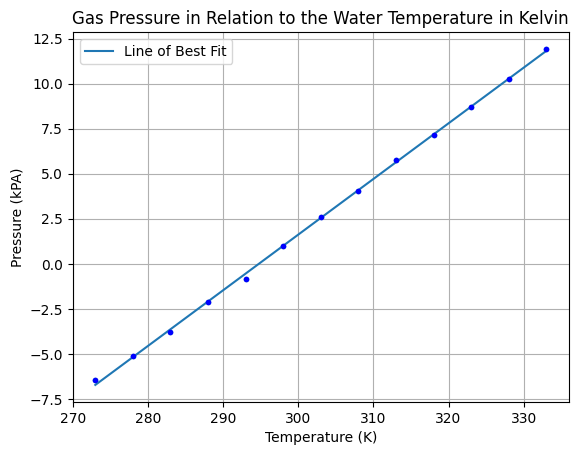

In [41]:
x_val2 = np.array([x for x in range(273, 334, 5)])
x_ax, y_ax = np.polyfit(x_val2, data[0], 1)
plt.figure()
plt.plot(x_val2, x_ax*x_val2+y_ax) #add line of best fit to plot
plt.legend(['Line of Best Fit'], loc="upper left")
plt.scatter(x_val2, data[0], marker=".") #add points to plot
plt.errorbar(x_val2, data[0], yerr=13*[stat1[4]], fmt=".", color="b")
plt.grid()
plt.title("Gas Pressure in Relation to the Water Temperature in Kelvin") 
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (kPA)')
plt.show()

## Intercept (in Kelvin)
With the use of the library scipy, we can find the intercept of the graph with the linregress functions in stats.

In [32]:
stat2 = stats.linregress(x_val2, data[0])
print(f"The intercept of the graph is equal to {round(stat2[1],4)} kPa")

The intercept of the graph is equal to -91.0438 kPa


## Table of Mean and Standard Error

In [12]:
table = {"File": p_data,
         "Mean": data[0],
         "Standard Error": data[1]}

show_table = pd.DataFrame(data=table)
show_table

,File,Mean,Standard Error
0,pressure_00C.csv,-6.421,0.00121
1,pressure_05C.csv,-5.122,0.00108
2,pressure_10C.csv,-3.800,0.00108
3,pressure_15C.csv,-2.098,0.00103
4,pressure_20C.csv,-0.870,0.00080
5,pressure_25C.csv,0.986,0.00183
6,pressure_30C.csv,2.571,0.00100
7,pressure_35C.csv,4.024,0.00117
8,pressure_40C.csv,5.777,0.00098
9,pressure_45C.csv,7.126,0.00123


In [42]:
#Lab 2 - Experimental Absolute Zero Temperature Analysis
print("The y-intercept tells us the gauge pressure of the system when the temperature is 0 Kelvin.")
print(f"If the intercept of the graph is equal to {round(stat2[1],3)} kPa, and the value of the atmospheric pressure is 95.99 kPa")
print(f"We can then conclude that the absolute pressure at 0 Kelvin is {round(stat2[1] + 95.99, 3)} kPa")
x_intercept = -4.946/0.3089
print("The x-intercept tells us the what temperature is needed to get 0 kPa.")
print(f"We can then conclude that the experimental value of absolute zero temperature is {round(x_intercept, 3)} Kelvin")
print(f"We can then conclude that the experimental value of absolute zero temperature is {round(x_intercept - 273.15, 3)} Celsius")

The y-intercept tells us the gauge pressure of the system when the temperature is 0 Kelvin.
If the intercept of the graph is equal to -91.044 kPa, and the value of the atmospheric pressure is 95.99 kPa
We can then conclude that the absolute pressure at 0 Kelvin is 4.946 kPa
The x-intercept tells us the what temperature is needed to get 0 kPa.
We can then conclude that the experimental value of absolute zero temperature is -16.012 Kelvin
We can then conclude that the experimental value of absolute zero temperature is -289.162 Celsius
